<a href="https://colab.research.google.com/github/BhanuPShahi/Airbnb-Bookings-Analysis/blob/main/Bhanu_Pratap_Shahi_24_02_2021_%5BABTN0101%5D_AirBnB_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##[ABTN0101] AirBnB Bookings Analysis

Introduction -

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

Dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

Explore and analyze the data to discover key understandings (not limited to these) such as : 

1.What can we learn about different hosts and areas?

2.What can we learn from predictions? (ex: locations, prices, reviews, etc)

3.Which hosts are the busiest and why?

4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?

##Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


##Loading the data set

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the data file and creating a dataframe
path='/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Week 4/Day 3/AirBnB Bookings Analysis/Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(path)

##Exploring the data


In this step we are going to perform the following operations..
*   Checking the shape of the dataframe.
*   Checking the info of the dataset.
*   Printing the head of the dataset.
*   Checking the summary of the dataset.




In [ ]:
#checking the shape of airbnb_df
airbnb_df.shape

(48895, 16)

In [ ]:
#checking the info of airbnb_df
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [ ]:
#Printing the summary of numerical attributes
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**What are neighbourhoods?**

### *Neighborhoods* are a way to help travelers make informed decisions about where to stay when planning a trip. When visiting a new city, it can be helpful to know which neighborhoods may fit your interests and the purpose of your trip.

##**Handling the missing values**

##Check for Missing Data

In [ ]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

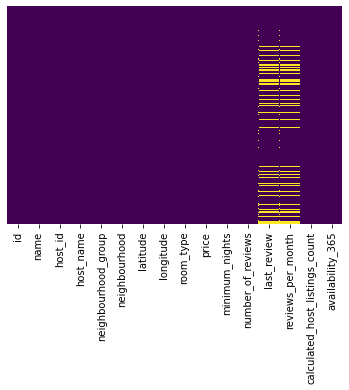

In [ ]:
#checking the missing data in the dataset
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (10, 5)


##Cleaning the data 

I am replacing NaN values of 'reviews_per_month' column with 0.

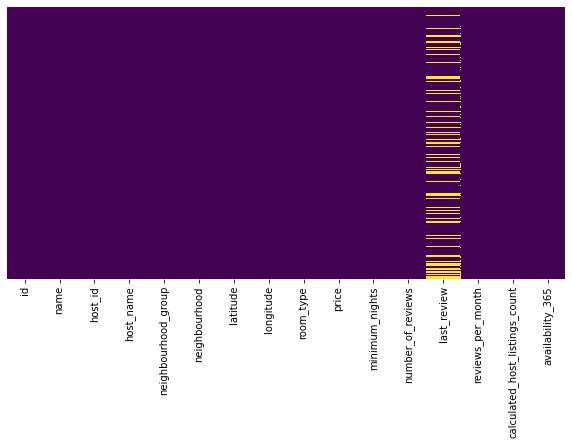

In [ ]:
#replacing NaN values of 'reviews_per_month' column with 0
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Checking the rows having null value in name and host_name column.**

In [ ]:
airbnb_df[airbnb_df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,0.00,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,0.00,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,0.00,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,0.00,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,0.00,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,0.00,5,0


We can see that 10 out of 16 of rows having **NaN** as name value have 0 reviews.
There may be a case that while listing the name was not entered and that's why people are not prefering those places.
So i am dropping those rows.

In [ ]:
#dropping those rows having null name value
new_airbnb_df=airbnb_df[~airbnb_df['name'].isnull()]

In [ ]:
airbnb_df[airbnb_df['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,0.00,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,0.00,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [ ]:
#dropping those rows having null host_name value
new_airbnb_df=new_airbnb_df[~new_airbnb_df['host_name'].isnull()]
new_airbnb_df.shape

(48858, 16)

##Plotting Rental listings on NY city map based on their latitude and longitude. 

In [ ]:
!pip install geopandas

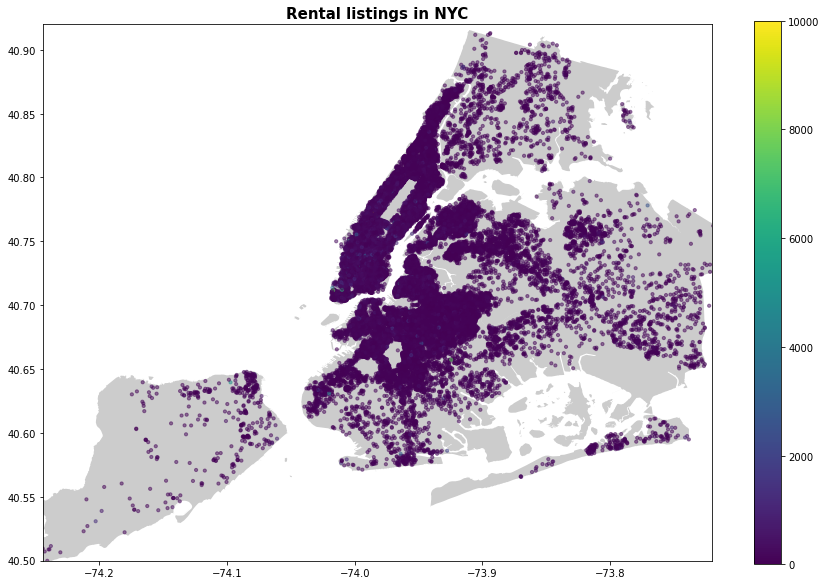

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
#loading the newyork city map
street_map = gpd.read_file('/content/drive/MyDrive/Borough Boundaries/geo_export_1e2a2aa9-e199-431f-8868-79b2b9366ce2.shp')

# zip x and y coordinates
geometry = [Point(xy) for xy in zip(airbnb_df['longitude'], airbnb_df['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(airbnb_df,geometry = geometry)
 
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,10))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Rental listings in NYC', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.24442,-73.72)
plt.ylim( 40.49979,40.92)
# show map
plt.show()

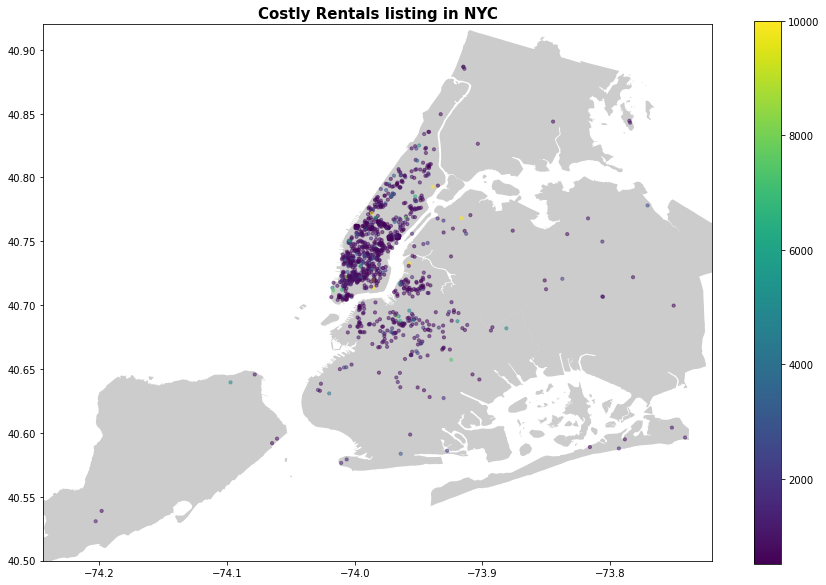

In [ ]:
#Extracting those rows having prices greater than 500
high_price_airbnb_df=airbnb_df[airbnb_df['price']>500]
# zip x and y coordinates
geometry = high_price_airbnb_df['geometry']
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(high_price_airbnb_df,geometry = geometry)
 
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,10))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Costly Rentals listing in NYC', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.24442,-73.72)
plt.ylim( 40.49979,40.92)
# show map
plt.show()

*  Most listings are in Manhattan region followed by Brooklyn region and least are in Staten island which can be seen from the density of the map.
*  The Central area of Manhattan region has no listings.That is a park named **Central Park** which comprises 6 percent of Manhattan's land area.
*  Most costly listings ( prices > 500$ ) are concentrated in Manhattan region and somewhat in Brooklyn too.

In [ ]:
high_price_airbnb_df.shape

(1044, 17)

<Figure size 936x504 with 0 Axes>

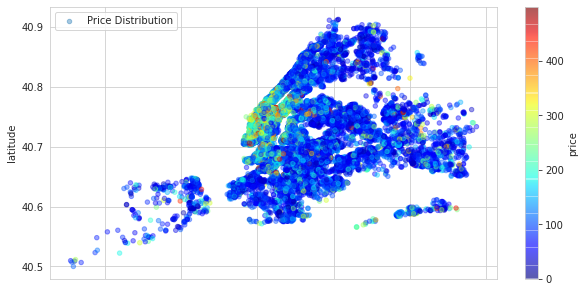

In [ ]:
plt.figure(figsize=(13,7))
ax=airbnb_df[airbnb_df.price<500].plot(kind='scatter', x='longitude',y='latitude',label='Price Distribution',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

*  Here we can see that room type and neighborhood have an effect on the listing price, but not the number of listings in the neighborhood.
*  Manhattan has more high price listing as well as room-types like entire-home and private rooms are also costlier.

##Exploring the categorical columns

**Visualizing different locations.**

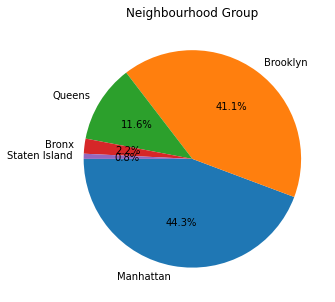

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group")
g = plt.pie(airbnb_df.neighbourhood_group.value_counts(), labels=airbnb_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

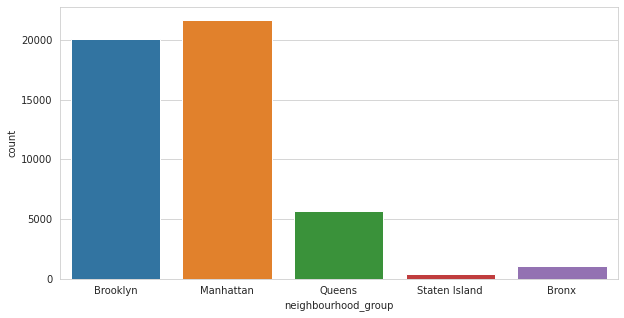

In [ ]:
#Visualising the data according to area
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('whitegrid')
sns.countplot(x='neighbourhood_group',data=airbnb_df)

*  Manhattan is the most demanded location followed by Brooklyn while Staten Island is the least in demand may be due to location factor as it seems to be isolated.

**Visualizing different Room-Types**

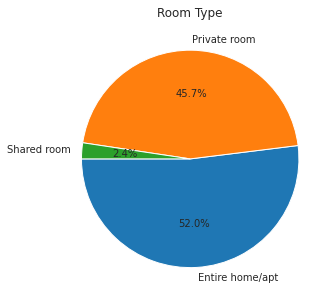

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Room Type")
g = plt.pie(airbnb_df.room_type.value_counts(), labels=airbnb_df.room_type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

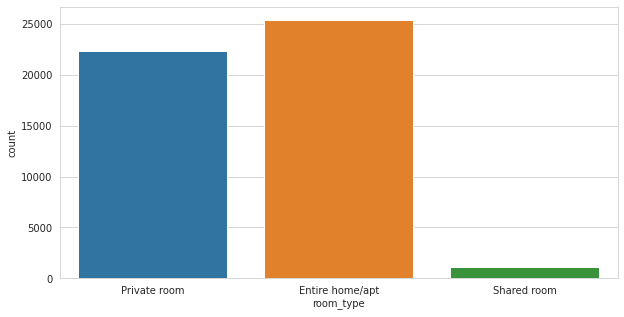

In [ ]:
#visualising the data according to room_type
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('whitegrid')
sns.countplot(x='room_type',data=airbnb_df)

**Conclusion**
*  Among the different room types available, the most demanded ones are entire-homes/apt followed by private-rooms and lastly shared rooms.
*  People are mostly preferring entire home/apt or private rooms means they are valuing their comfort and privacy  more than money.

**Visualizing different room-types according to different locations.**

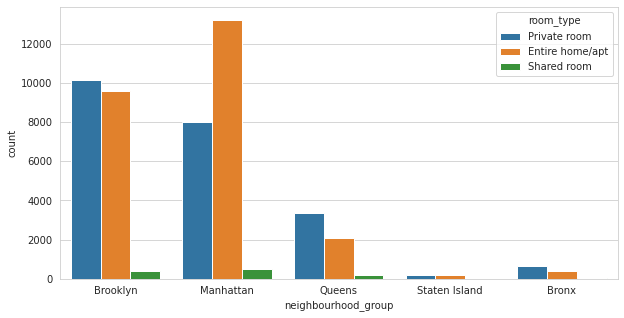

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('whitegrid')
sns.countplot(x='neighbourhood_group',hue='room_type',data=airbnb_df)

**Conclusion**
*  In Manhattan people are mostly prefering Entire-home/apt which reflects their good economic condition or the city may be a good family vacation place having parks like **Central Park**.
*  Brooklyn is somewhat similar to Manhattan.
*  For Staten island there are minimum number of listings and have only 9 shared-room listings.

In [ ]:
airbnb_df[(airbnb_df['neighbourhood_group']=='Staten Island') & (airbnb_df['room_type']=='Shared room')].shape

(9, 17)

## **Finding prices of different locations with their corresponding room_type**

## Analysing Different locations according to their room_type and corresponding median prices

In [ ]:
#extracting a df from airdnd_df
price_df = airbnb_df[['neighbourhood_group','room_type','price']]
#grouping this data frame according to their neighbourhood_group and room_type and assigning median prices
median_price_df =price_df.groupby(['neighbourhood_group','room_type']).median().reset_index()

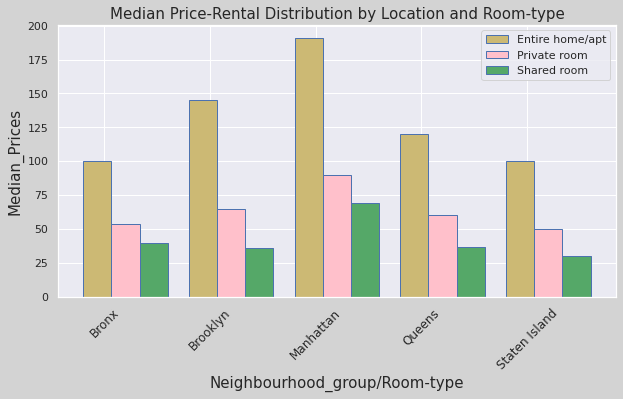

In [130]:
#getting the unique locations
locations = median_price_df.neighbourhood_group.unique()
x_rooms1 = [0.8, 3.8, 6.8, 9.8, 12.8]
x_rooms2 = [1.6, 4.6, 7.6, 10.6, 13.6]
x_rooms3 = [2.4, 5.4, 8.4, 11.4, 14.4]
y_values1 = median_price_df[median_price_df['room_type'] == 'Entire home/apt']['price'].values
y_values2 = median_price_df[median_price_df['room_type'] == 'Private room']['price'].values
y_values3 = median_price_df[median_price_df['room_type'] == 'Shared room']['price'].values
fig,ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('lightgray')
plt.bar(x_rooms1, y_values1, color='y', edgecolor='b')
plt.bar(x_rooms2, y_values2, color='pink', edgecolor='b')
plt.bar(x_rooms3, y_values3, color='g', edgecolor='b')
ax.set_xticks(range(1,16,3))
ax.set_xticklabels(locations, fontsize='12')
for tick in ax.get_xticklabels():
  tick.set_rotation(45)
plt.xlabel('Neighbourhood_group/Room-type',fontsize='15')
plt.ylabel('Median_Prices', fontsize='15')
plt.legend(labels=median_price_df.room_type.unique(), loc='best')
plt.title('Median Price-Rental Distribution by Location and Room-type',fontsize='15')
plt.show()

**Conclusion**
*  Entire-home/apt of every location have higher prices followed by private-rooms and shared-rooms.
*  Manhattan is most demanded location followed by Brooklyn.
*  Manhattan is the costliest location for every room type may be due to their location or high demand followed by Brooklyn .
*  The price for private-room rentals of Manhattan is somewhat in the same range
of entire-home/apt rentals of other locations.


**Visualizing top 20 hosts and finding the reason behind it.** 

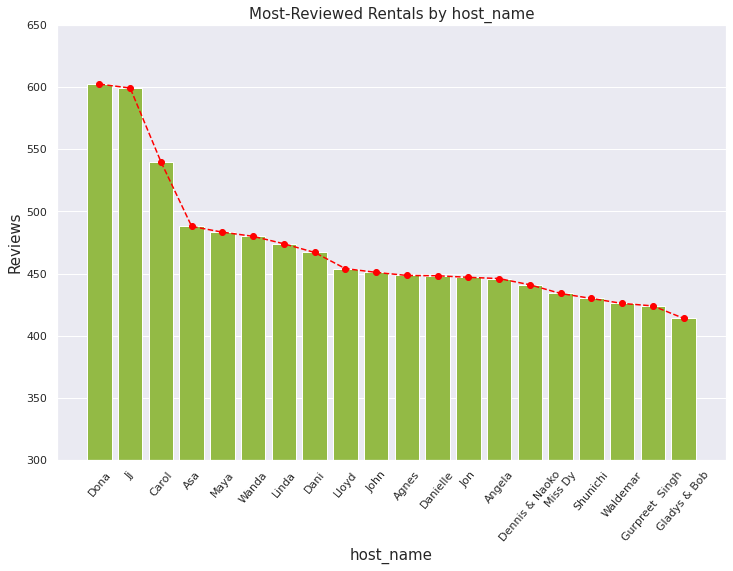

In [ ]:
most_review_host_df = airbnb_df.sort_values('number_of_reviews',ascending=False)
top_reviewed_host_df = most_review_host_df.loc[:,['host_name','number_of_reviews']][:30]
top_reviewed_host_df = top_reviewed_host_df.groupby('host_name').mean().sort_values('number_of_reviews',ascending=False).reset_index()
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x=top_reviewed_host_df['host_name'],y=top_reviewed_host_df['number_of_reviews'].values,color='yellowgreen',ax=ax)
plt.plot(top_reviewed_host_df['number_of_reviews'], marker='o', color='red',linestyle='--')
plt.ylabel('Reviews', fontsize='15')
plt.xlabel('host_name',fontsize='15')
plt.ylim((300,650))
for ax in ax.get_xticklabels():
  ax.set_rotation(50)
plt.title('Most-Reviewed Rentals by host_name',fontsize='15')
plt.show()
sns.set()

In [ ]:
top_host=top_reviewed_host_df['host_name'].tolist()

In [129]:
top_host_dict={}
for elem in top_host:
  avg_price=airbnb_df[airbnb_df['host_name']==elem].price.mean()
  top_host_dict[elem]=avg_price

top_host_avg_price_df=pd.DataFrame(top_host_dict.items(), columns=['Host', 'avg_price'])
top_host_avg_price_df.set_index('Host', inplace=True)
# top_host_avg_price_df

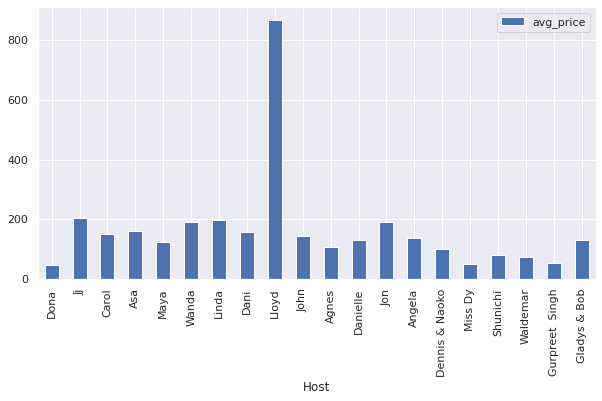

In [128]:
top_host_avg_price_df.plot(kind='bar')

plt.show()

**Conclusion**
*  Almost every popular host have rental listings in the price range between 50 and 200.

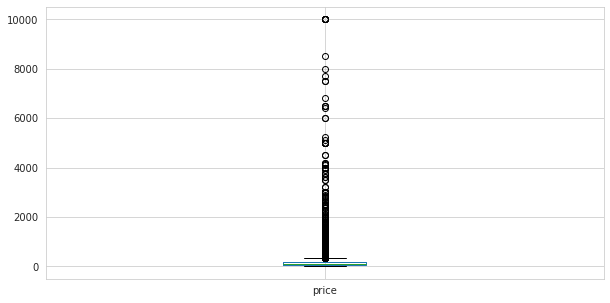

In [ ]:
airbnb_df.boxplot(column=['price'])
plt.show()
plt.rcParams['figure.figsize'] = (20, 10)


In [ ]:
area_df = airbnb_df[['neighbourhood']]
area_df['number_of_bookings']=airbnb_df['id']
grouped_area_df=area_df.groupby('neighbourhood').count().reset_index()
grouped_area_df.sort_values('number_of_bookings',ascending=False,inplace=True,ignore_index=True)

In [ ]:
airbnb_df[airbnb_df['availability_365']==0].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851)
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,POINT (-73.95596 40.68688)
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,POINT (-73.96723 40.80178)
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0,POINT (-74.00525 40.73530)
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0,POINT (-73.95718 40.71842)


In [ ]:
airbnb_df.sort_values('last_review',ascending=False,inplace=True,ignore_index=True)
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.00,1,1,POINT (-73.92801 40.69805)
1,33119863,Queens Studio.,42540127,Tio,Queens,Bayside,40.77067,-73.78278,Entire home/apt,55,2,37,2019-07-08,10.37,1,6,POINT (-73.78278 40.77067)
2,34244391,A space like a home,258536261,Judy,Brooklyn,Cypress Hills,40.67959,-73.88302,Entire home/apt,100,2,11,2019-07-08,5.69,1,179,POINT (-73.88302 40.67959)
3,34231172,Fully renovated brick house floor in Brooklyn,59642348,Kevin,Brooklyn,Sunset Park,40.64550,-74.01262,Entire home/apt,95,1,9,2019-07-08,9.00,1,106,POINT (-74.01262 40.64550)
4,34204893,Gorgeous spacious 1 bedroom apartment,85773188,Mark,Brooklyn,Brighton Beach,40.57589,-73.96636,Entire home/apt,86,1,10,2019-07-08,9.09,1,20,POINT (-73.96636 40.57589)


In [ ]:
grouped_area_df.head(5)

,neighbourhood,number_of_bookings
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971


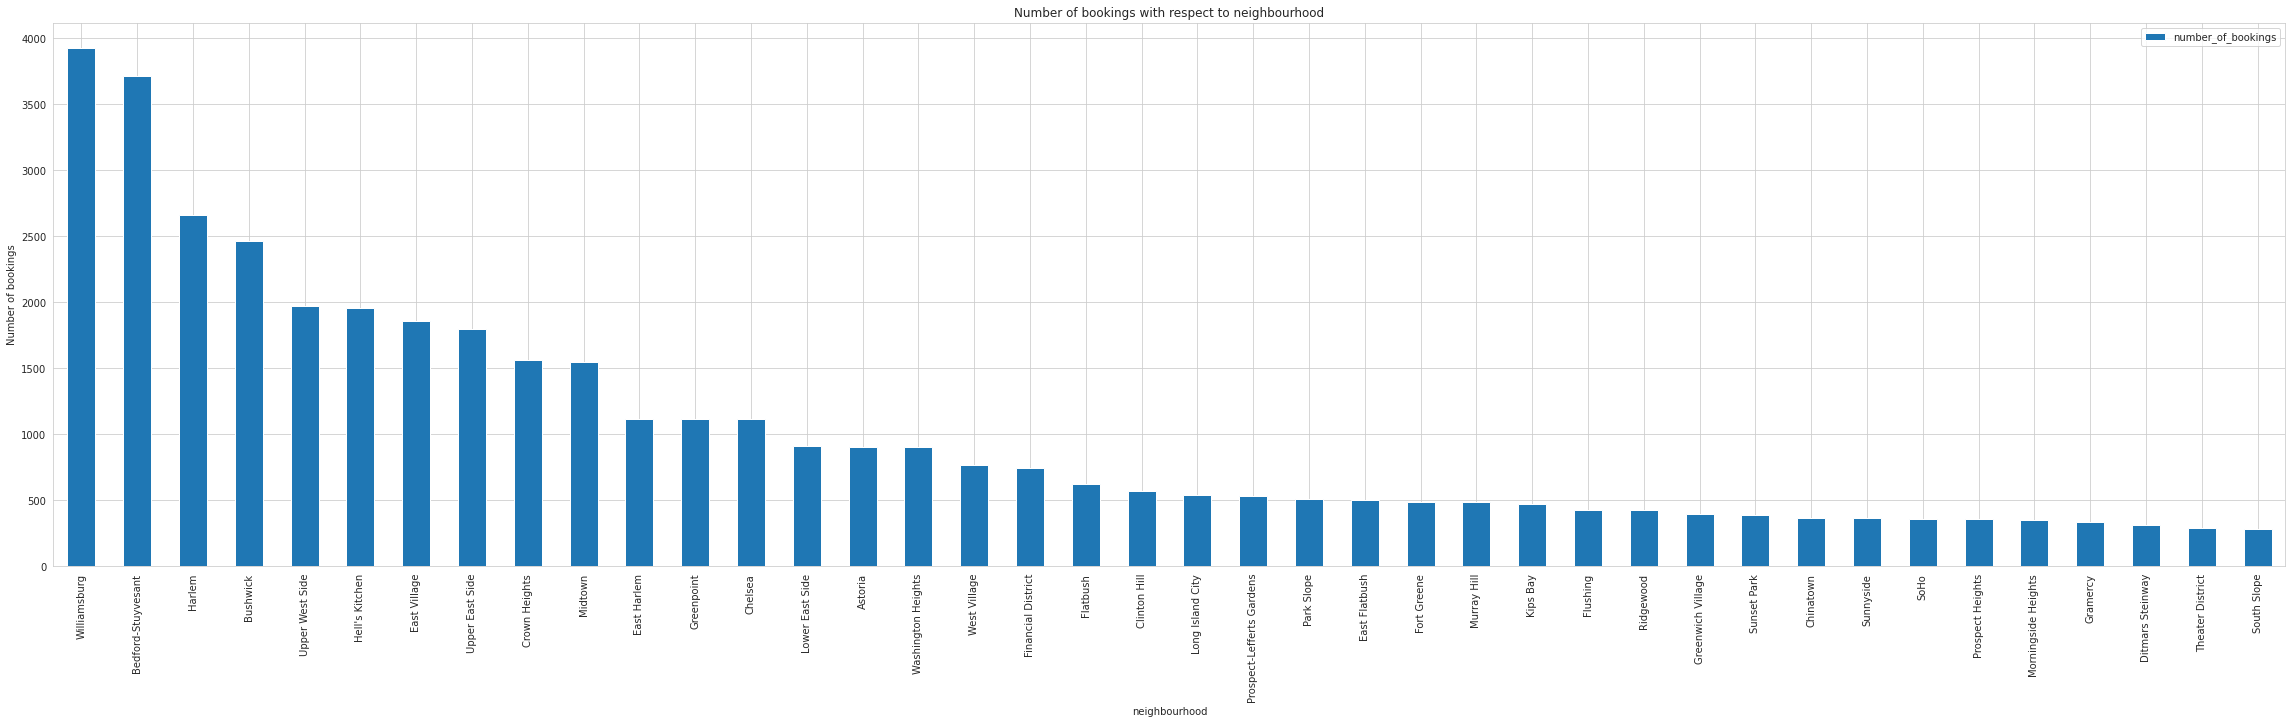

In [ ]:
#plotting the top 40 preferred area
top_40_preferred_area_df=grouped_area_df[0:40]
top_40_preferred_area_df.plot(x = "neighbourhood", y = "number_of_bookings", kind = "bar")
plt.title('Number of bookings with respect to neighbourhood')
plt.ylabel('Number of bookings')
plt.xlabel('neighbourhood')
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

# Area Analysis

*   Manhattan neighbourhood_group is most in demand followed by Brooklyn.





In [ ]:
host_df=airbnb_df.groupby('host_name').count().reset_index()
host_df.sort_values('id',ascending=False,inplace=True,ignore_index=True)
host_df.shape


(11452, 17)

In [ ]:
host_having_max_listings=airbnb_df[airbnb_df['calculated_host_listings_count']==airbnb_df.calculated_host_listings_count.max()]

In [ ]:
host_having_max_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
7454,32634874,Sonder | Stock Exchange | Pristine 1BR + Sofa Bed,219517861,Sonder (NYC),Manhattan,Financial District,40.70604,-74.01216,Entire home/apt,248,2,7,2019-06-26,2.59,327,294,POINT (-74.01216 40.70604)
8276,34341994,Sonder | 116 John | Polished 2BR + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70781,-74.00525,Entire home/apt,179,29,1,2019-06-24,1.00,327,339,POINT (-74.00525 40.70781)
8390,32224172,Sonder | Stock Exchange | Restful 1BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70752,-74.01046,Entire home/apt,235,2,7,2019-06-24,1.52,327,306,POINT (-74.01046 40.70752)
8638,32237811,Sonder | Stock Exchange | Design Studio + Laundry,219517861,Sonder (NYC),Manhattan,Financial District,40.70797,-74.01227,Entire home/apt,205,2,10,2019-06-24,2.54,327,338,POINT (-74.01227 40.70797)
8641,32237138,Sonder | Stock Exchange | Lively Studio + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70714,-74.01225,Entire home/apt,203,2,7,2019-06-24,1.88,327,338,POINT (-74.01225 40.70714)


In [ ]:
place_having_max_reviews=airbnb_df[airbnb_df['number_of_reviews']==airbnb_df.number_of_reviews.max()]

##Analysis on availability_365 column

In [ ]:
#extracting those rows having 0 value in availability_365 column
zero_availability_df=airbnb_df[airbnb_df['availability_365']==0]

There may be two possibilities for 0 value in availability column.


*   May be that place was previously available for booking but closed currently.
*   There may be a chance of bad entry.



In [ ]:
#sorting them according to their last review date
zero_availability_df.sort_values('last_review',ascending=False,inplace=True,ignore_index=True)
print(zero_availability_df.shape)
zero_availability_df.head()

(17533, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,34151215,Bright and Artsy 2 Bedroom Apartment,257810280,Leslie,Brooklyn,Bedford-Stuyvesant,40.67935,-73.93715,Entire home/apt,100,1,5,2019-07-08,5.00,1,0,POINT (-73.93715 40.67935)
1,31714168,5 min away from LGA,213014559,Kam,Queens,East Elmhurst,40.76893,-73.87712,Entire home/apt,135,1,17,2019-07-08,3.57,2,0,POINT (-73.87712 40.76893)
2,25380654,"Cozy, Confortable, Modern spacious and nice Room",191621249,Geraldine,Manhattan,Chelsea,40.74284,-73.99842,Private room,99,1,95,2019-07-08,7.20,2,0,POINT (-73.99842 40.74284)
3,21264131,Beautiful Super Cozy Studio,67226812,RaShaan,Brooklyn,Bedford-Stuyvesant,40.68744,-73.94905,Entire home/apt,95,1,89,2019-07-08,4.43,1,0,POINT (-73.94905 40.68744)
4,13216246,Comfy Greenpoint room w/ easy access to Manhat...,6531491,Stephen,Brooklyn,Greenpoint,40.72217,-73.94800,Private room,75,1,55,2019-07-08,1.46,1,0,POINT (-73.94800 40.72217)


**Conclusion**

There are more than 17000 rows having availability as 0.
So this should be the case that those rental places are currently closed or not accepting new bookings.

We can check their last_review date and can assume that after that they are not operational.

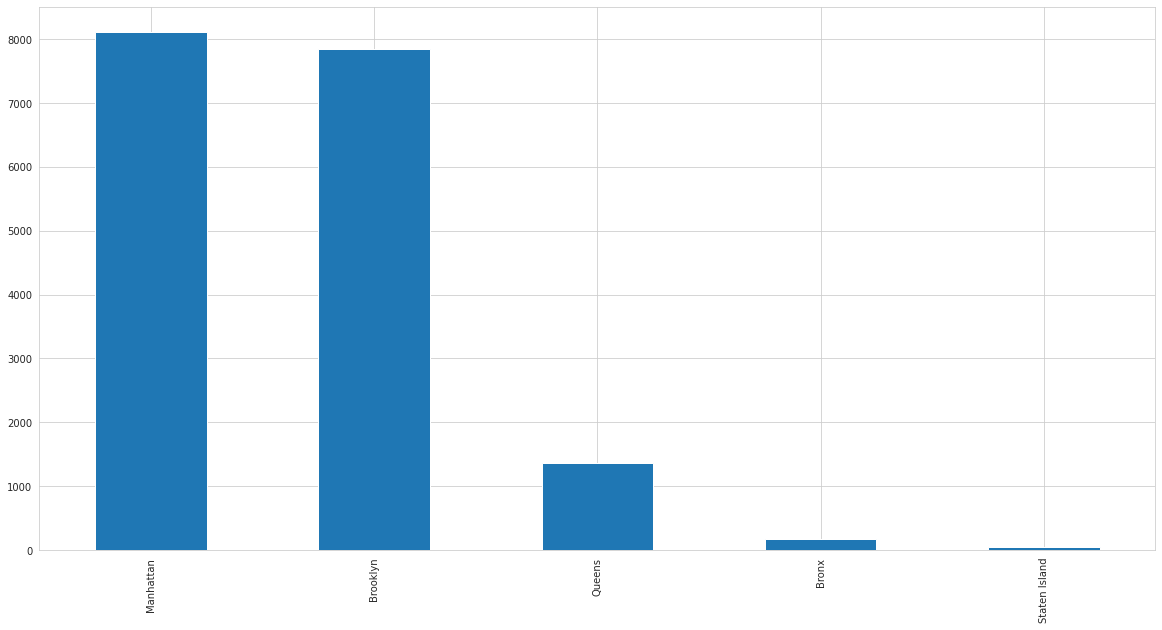

In [ ]:
zero_availability_df['neighbourhood_group'].value_counts().plot(kind='bar')


##Price Analysis

In [ ]:
#summary of descriptive statistics
airbnb_df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


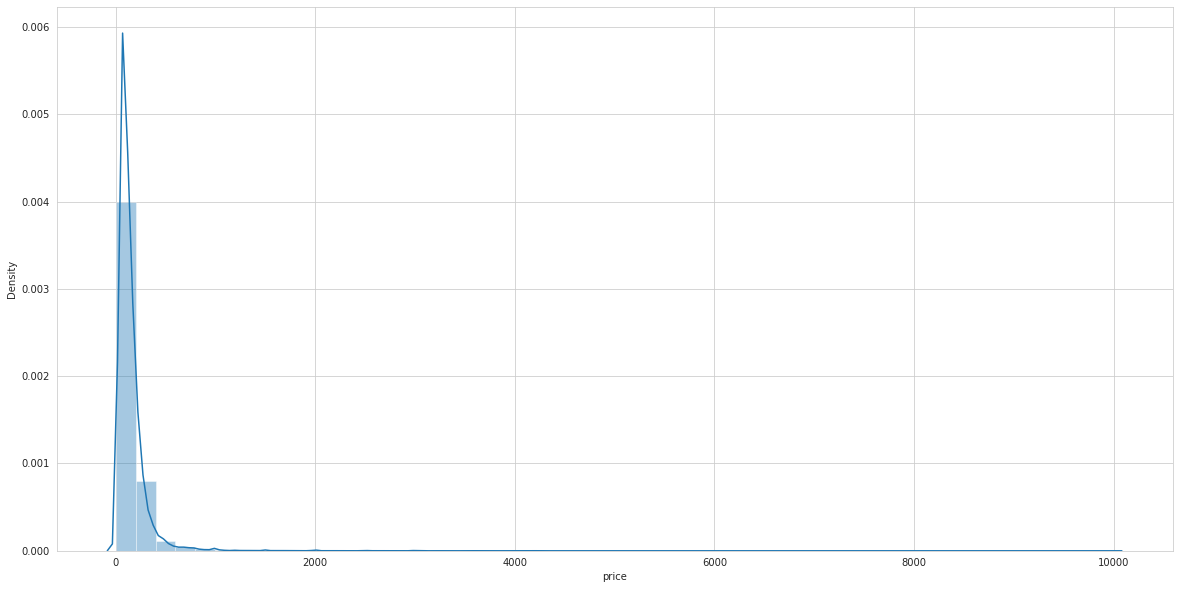

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 10)
sns.distplot(airbnb_df['price']);

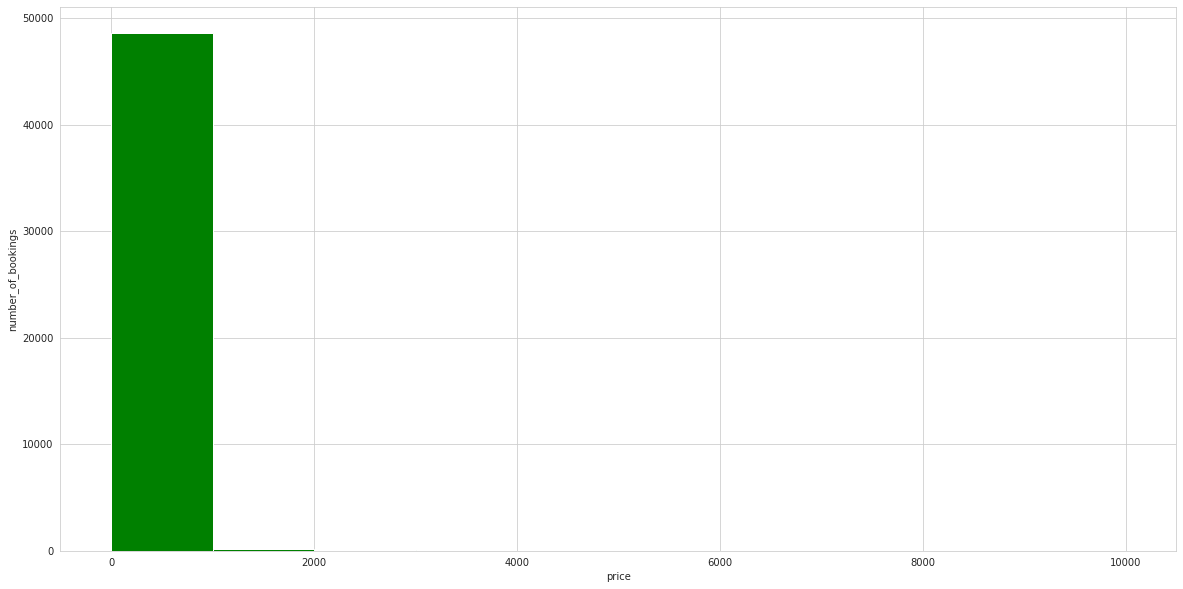

In [ ]:
plt.hist(airbnb_df.price, color='green')
plt.xlabel('price')
plt.ylabel('number_of_bookings')
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
airbnb_df.sort_values('price',ascending=False,ignore_index=True).head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,0.00,1,83,POINT (-73.98665 40.77213)
1,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0,POINT (-73.91651 40.76810)
2,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0,POINT (-73.95739 40.73260)
3,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,0.00,1,365,POINT (-73.98566 40.71980)
4,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0,POINT (-73.93898 40.79264)


Here the price value like 0 and 10000 are outliers.

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in new_airbnb_df.columns if new_airbnb_df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
new_airbnb_df[numerical_features].describe()

Number of numerical variables:  10


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Plotting the Correlation Matrix**

In [122]:
corr = airbnb_df.corr()
# corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.00,0.59,-0.00,0.09,0.01,-0.01,-0.32,0.18,0.13,0.09
host_id,0.59,1.00,0.02,0.13,0.02,-0.02,-0.14,0.21,0.15,0.20
latitude,-0.00,0.02,1.00,0.08,0.03,0.02,-0.02,-0.02,0.02,-0.01
longitude,0.09,0.13,0.08,1.00,-0.15,-0.06,0.06,0.14,-0.11,0.08
price,0.01,0.02,0.03,-0.15,1.00,0.04,-0.05,-0.05,0.06,0.08
minimum_nights,-0.01,-0.02,0.02,-0.06,0.04,1.00,-0.08,-0.12,0.13,0.14
number_of_reviews,-0.32,-0.14,-0.02,0.06,-0.05,-0.08,1.00,0.59,-0.07,0.17
reviews_per_month,0.18,0.21,-0.02,0.14,-0.05,-0.12,0.59,1.00,-0.05,0.16
calculated_host_listings_count,0.13,0.15,0.02,-0.11,0.06,0.13,-0.07,-0.05,1.00,0.23
availability_365,0.09,0.20,-0.01,0.08,0.08,0.14,0.17,0.16,0.23,1.00
